# Titanic: Machine Learning from Disaster

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

## 1. Data loading and cleaning

In [20]:
titanic_data = pd.read_csv("train.csv", encoding = 'UTF-8') 
titanic_test_data = pd.read_csv("test.csv", encoding = 'UTF-8')  
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2. Feature Selection 

### 2.1 Name

In [21]:
train_test_data = [titanic_data, titanic_test_data] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [23]:
side_by_side(titanic_data['Title'].value_counts(), titanic_test_data['Title'].value_counts())

Mr          517              Mr        240            
Miss        182              Miss       78            
Mrs         125              Mrs        72            
Master       40              Master     21            
Dr            7              Col         2            
Rev           6              Rev         2            
Major         2              Ms          1            
Col           2              Dr          1            
Mlle          2              Dona        1            
Lady          1              Name: Title, dtype: int64
Jonkheer      1                                       
Countess      1                                       
Capt          1                                       
Ms            1                                       
Don           1                                       
Sir           1                                       
Mme           1                                       
Name: Title, dtype: int64                             



### Title map 
Mr : 0
Miss : 1
Mrs: 2
Others: 3

In [24]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
def bar_chart(train_data, feature): 
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead'] 
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

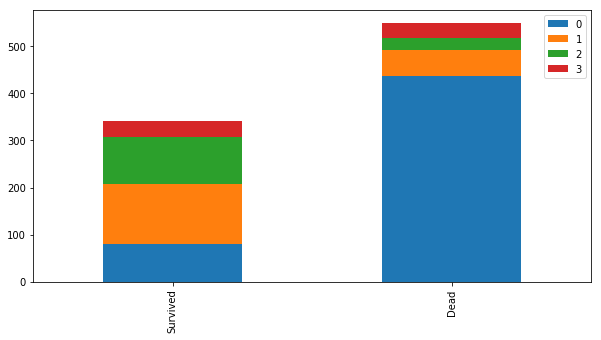

In [27]:
bar_chart(titanic_data, "Title")

### 2.2 Gender

In [28]:
gender_map = {"female": 1, "male": 0}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(gender_map)

In [29]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


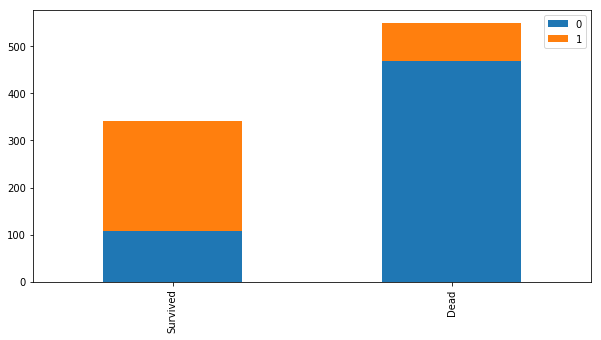

In [30]:
bar_chart(titanic_data, "Sex")

### 2.3 Age

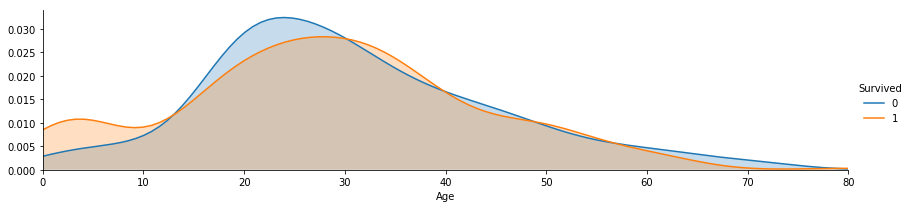

In [32]:
facet = sns.FacetGrid(titanic_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
 
plt.show()

(0, 20)

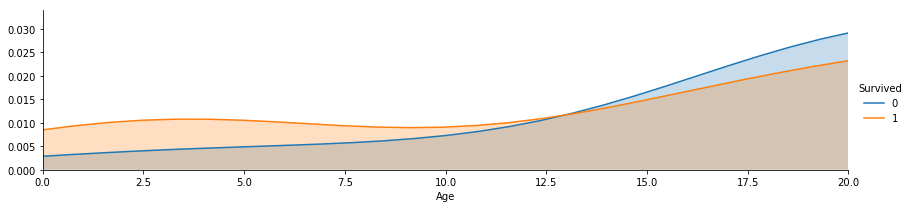

In [33]:
facet = sns.FacetGrid(titanic_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

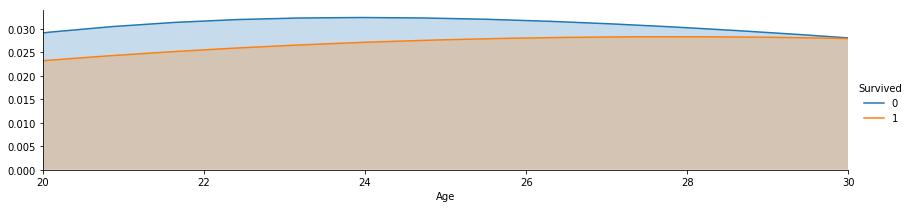

In [34]:
facet = sns.FacetGrid(titanic_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
plt.xlim(20, 30) 

In [35]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [40]:
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


feature vector map:
* child: 0
* young: 1
* adult: 2
* mid-age: 3
* senior: 4

In [37]:

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0


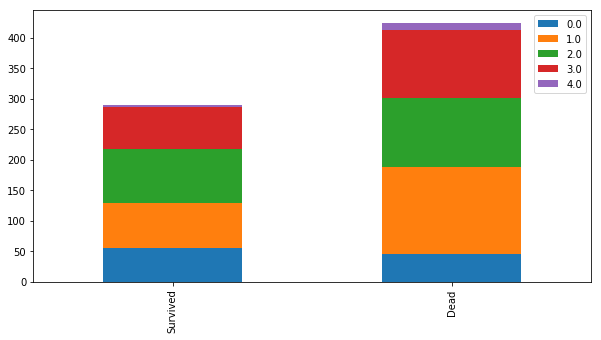

In [39]:
bar_chart(titanic_data, 'Age')

### 2.4 Embarked 

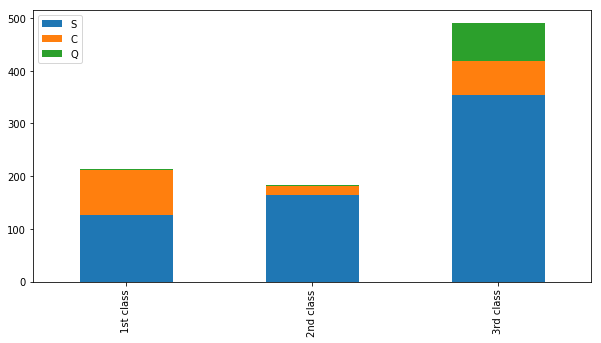

In [41]:
Pclass1 = titanic_data[titanic_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = titanic_data[titanic_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = titanic_data[titanic_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [42]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [43]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [44]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0


### 2.5 Fare 

In [47]:
titanic_data["Fare"].fillna(titanic_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
titanic_test_data["Fare"].fillna(titanic_test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
titanic_data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,1,2


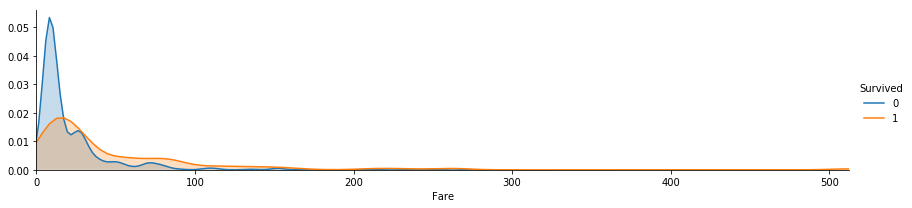

In [49]:
facet = sns.FacetGrid(titanic_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, titanic_data['Fare'].max()))
facet.add_legend()
 
plt.show()

(0, 20)

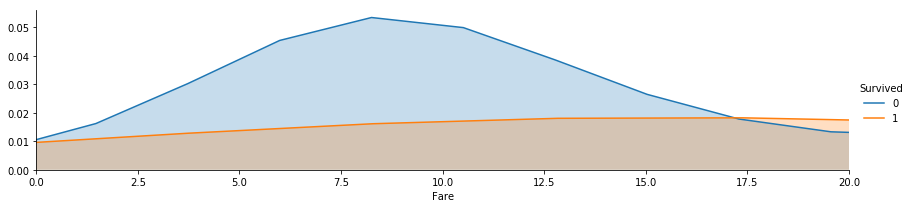

In [50]:
facet = sns.FacetGrid(titanic_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, titanic_data['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 60)

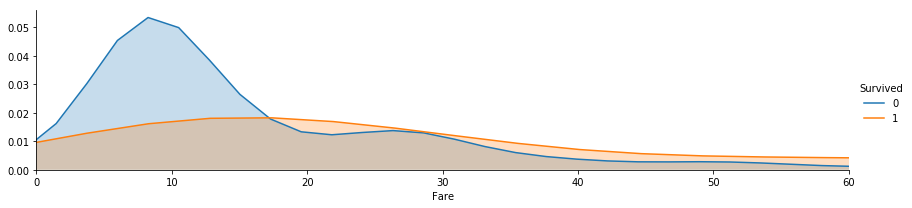

In [51]:
facet = sns.FacetGrid(titanic_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, titanic_data['Fare'].max()))
facet.add_legend()
plt.xlim(0, 60)

In [52]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [53]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0


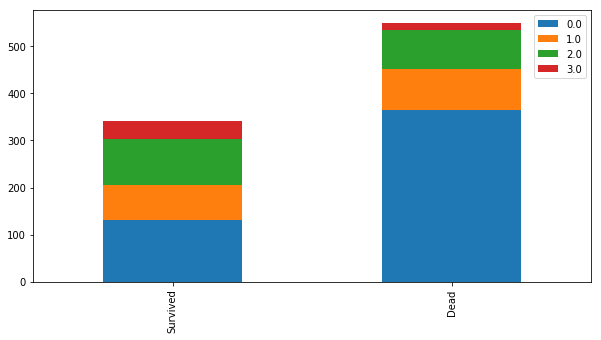

In [54]:
bar_chart(titanic_data, 'Fare')

### 2.6 Family Size 

In [55]:
titanic_data["FamilySize"] = titanic_data["SibSp"] + titanic_data["Parch"] + 1
titanic_test_data["FamilySize"] = titanic_test_data["SibSp"] + titanic_test_data["Parch"] + 1

(0, 11.0)

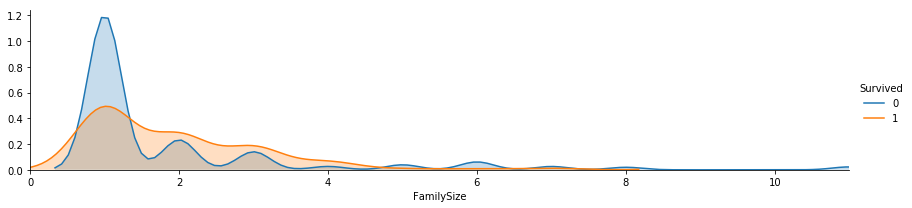

In [56]:
facet = sns.FacetGrid(titanic_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, titanic_data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [57]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [80]:
titanic_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,0,0,0.4
1,1,1,1,3.0,2.0,1,2,0.4
2,1,3,1,1.0,0.0,0,1,0.0
3,1,1,1,2.0,2.0,0,2,0.4
4,0,3,0,2.0,0.0,0,0,0.0
5,0,3,0,NaN,0.0,2,0,0.0
6,0,1,0,3.0,2.0,0,0,0.0
7,0,3,0,0.0,1.0,0,3,1.6
8,1,3,1,2.0,0.0,0,2,0.8
9,1,2,1,0.0,2.0,1,2,0.4


In [59]:
features_drop = ['Ticket', 'SibSp', 'Parch']
titanic_data = titanic_data.drop(features_drop, axis=1)
titanic_test_data = titanic_test_data.drop(features_drop, axis=1)
titanic_data = titanic_data.drop(['PassengerId'], axis=1)

In [62]:
titanic_data = titanic_data.drop(['Name'], axis=1)

In [65]:
titanic_data = titanic_data.drop(['Cabin'], axis=1)

In [72]:
train_data = titanic_data.drop('Survived', axis=1)
target = titanic_data['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [77]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,1.0,0.0,0,0,0.4
1,1,1,3.0,2.0,1,2,0.4
2,3,1,1.0,0.0,0,1,0.0
3,1,1,2.0,2.0,0,2,0.4
4,3,0,2.0,0.0,0,0,0.0
5,3,0,2.0,0.0,2,0,0.0
6,1,0,3.0,2.0,0,0,0.0
7,3,0,0.0,1.0,0,3,1.6
8,3,1,2.0,0.0,0,2,0.8
9,2,1,0.0,2.0,1,2,0.4


In [82]:
side_by_side(train_data.isnull().sum(), train_data.count())

Pclass        0    Pclass        891
Sex           0    Sex           891
Age           0    Age           891
Fare          0    Fare          891
Embarked      0    Embarked      891
Title         0    Title         891
FamilySize    0    FamilySize    891
dtype: int64       dtype: int64     



## 3. Modeling 

In [83]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### 3.1 Cross Validation (K-fold)

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 3.1.1 kNN

In [85]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.79775281 0.7752809  0.82022472 0.84269663 0.79775281
 0.86516854 0.80898876 0.84269663 0.84269663]


In [86]:
round(np.mean(score)*100, 2)

82.15

### 3.1.2 Ramdom Forest

In [87]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.82022472 0.78651685 0.76404494 0.87640449 0.76404494
 0.79775281 0.78651685 0.75280899 0.84269663]


In [88]:
round(np.mean(score)*100, 2)

80.13

### 3.1.3 SVM

In [ ]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [90]:
round(np.mean(score)*100,2)

83.05

In [102]:
train_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,1.0,0.0,0,0,0.4
1,1,1,3.0,2.0,1,2,0.4
2,3,1,1.0,0.0,0,1,0.0
3,1,1,2.0,2.0,0,2,0.4
4,3,0,2.0,0.0,0,0,0.0


## 4. Testing 

In [93]:
titanic_test_data = titanic_test_data.drop(['Name', 'Cabin'], axis=1)

In [97]:
side_by_side(titanic_test_data.isnull().sum(), titanic_test_data.count())

PassengerId    0    PassengerId    418
Pclass         0    Pclass         418
Sex            0    Sex            418
Age            0    Age            418
Fare           0    Fare           418
Embarked       0    Embarked       418
Title          0    Title          418
FamilySize     0    FamilySize     418
dtype: int64        dtype: int64      



In [96]:
titanic_test_data["Age"].fillna(2, inplace = True)

In [98]:
clf = SVC()
clf.fit(train_data, target)

test_data = titanic_test_data.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

C:\Users\Saitama\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [99]:
submission = pd.DataFrame({
        "PassengerId": titanic_test_data["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [100]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
